In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp /content/drive/MyDrive/CSVs/* ./

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime

In [443]:
df = pd.read_csv('/content/Infosys_stock.csv')

In [444]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-01,666.299988,654.150024,660.950012,665.049988,2943390.0,615.497864
1,2019-01-02,674.000000,662.049988,666.000000,669.049988,7416655.0,619.199890
2,2019-01-03,677.000000,663.099976,672.000000,669.150024,6827249.0,619.292419
3,2019-01-04,673.900024,651.000000,671.750000,661.049988,7889310.0,611.795959
4,2019-01-07,673.599976,661.500000,665.000000,671.700012,8046340.0,621.652405


In [445]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
237,2019-12-24,736.950012,728.299988,736.950012,733.400024,2890759.0,708.218262
238,2019-12-26,734.549988,726.549988,732.000000,728.950012,3821806.0,703.921021
239,2019-12-27,737.500000,728.849976,729.750000,736.950012,3399094.0,711.646362
240,2019-12-30,737.950012,727.250000,736.099976,732.900024,5368416.0,707.735474
241,2019-12-31,737.750000,725.450012,729.700012,731.150024,6927885.0,706.045471


#Closing Price Analysis

In [446]:
close = df['Close']
print(close)

0      665.049988
1      669.049988
2      669.150024
3      661.049988
4      671.700012
          ...    
237    733.400024
238    728.950012
239    736.950012
240    732.900024
241    731.150024
Name: Close, Length: 242, dtype: float64


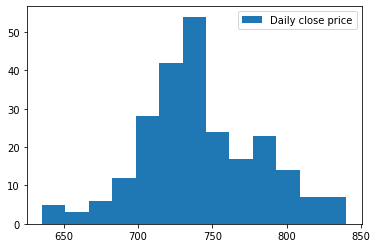

In [447]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

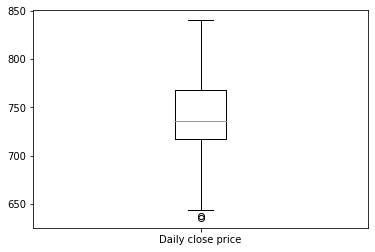

In [448]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

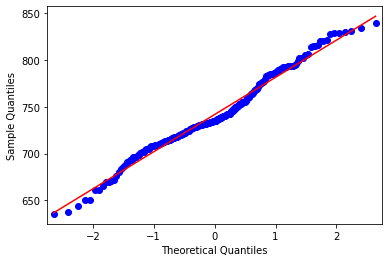

In [449]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [450]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))
print("Skewness of the distribution is: ", stats.skew(close))
print("Skewtest of the distribution is: ", stats.skewtest(close))
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Mean is:  741.6966920963004
Standard deviation is:  39.803330825176275
Median is:  735.25


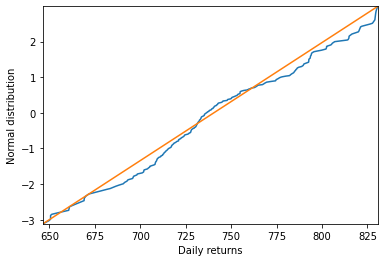

In [455]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

#**Stock Return Analysis**

In [456]:
## Daily Return
returns = close.pct_change(1).dropna()
returns = returns * 100
print(returns)

1      0.601459
2      0.014952
3     -1.210496
4      1.611077
5     -0.245649
         ...   
237   -0.353258
238   -0.606765
239    1.097469
240   -0.549561
241   -0.238777
Name: Close, Length: 241, dtype: float64


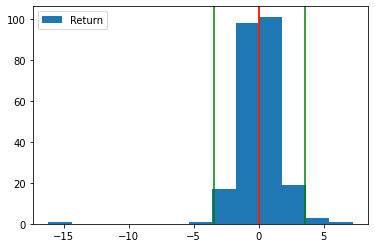

In [459]:
plt.hist(returns, bins="rice", label="Return")
plt.axvline(returns.mean(), color='darkorange')
plt.axvline(returns.median(), color='red')
plt.axvline(returns.mean() - 2*returns.std(), color='green')
plt.axvline(returns.mean() + 2*returns.std(), color='green')

plt.legend()
plt.show()

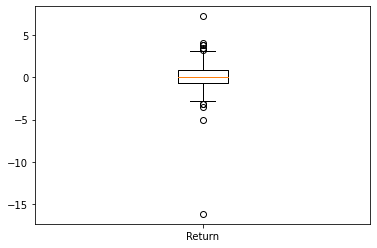

In [460]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

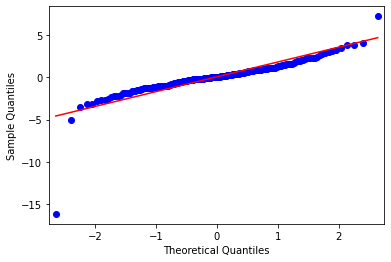

In [461]:
from statsmodels.graphics.gofplots import qqplot
qqplot(returns, line='s')
plt.show()

In [462]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))
print("Skewness of the distribution is: ", stats.skew(returns))
print("Skewtest of the distribution is: ", stats.skewtest(returns))
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Mean is:  0.05538668323413108
Standard deviation is:  1.7576333134445263
Median is:  0.04362697339963528
Skewness of the distribution is:  -2.9621672011838465
Skewtest of the distribution is:  SkewtestResult(statistic=-10.901639445896878, pvalue=1.1319903590046008e-27)
Kurtosis of the distributionn is:  29.80732240398826
Kurtosis test of the distribution is:  KurtosistestResult(statistic=9.450027911947172, pvalue=3.387403602169322e-21)


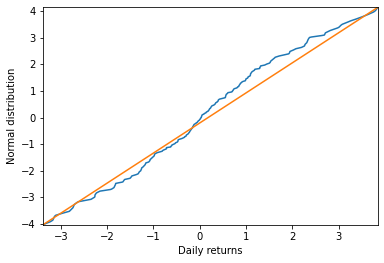

In [463]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()